In [1]:
import xarray as xr
from teleconnections import build_confidence_mask

In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
# Open lower and upper percentile files
lower = xr.open_mfdataset("/projappl/project_465000454/nurissom/AQUA/diagnostics/teleconnections/cli/teleconnections_ENSO_bootstrap_IFS-NEMO_historical-1990_lra-r100-monthly_lower.nc")
upper = xr.open_mfdataset("/projappl/project_465000454/nurissom/AQUA/diagnostics/teleconnections/cli/teleconnections_ENSO_bootstrap_IFS-NEMO_historical-1990_lra-r100-monthly_upper.nc")

In [4]:
map = xr.open_mfdataset("/projappl/project_465000454/nurissom/AQUA/diagnostics/teleconnections/cli/output/netcdf/teleconnections_ENSO_regression_IFS-NEMO_historical-1990_lra-r100-monthly.nc")

In [5]:
build_confidence_mask?

Signature:
build_confidence_mask(
    map: xarray.core.dataarray.DataArray,
    lower: xarray.core.dataarray.DataArray,
    upper: xarray.core.dataarray.DataArray,
    mask_concordance=True,
)
Docstring:
Build the confidence masks based on the lower and upper percentiles.

Args:
    reg (xr.DataArray): Regression map of the dataset
    lower (xr.DataArray): Lower percentile map
    upper (xr.DataArray): Upper percentile map
    mask_concordance (bool): Whether to mask the concordance regions. Default is True.

Returns:
    xr.DataArray: Confidence mask
File:      /pfs/lustrep3/projappl/project_465000454/nurissom/AQUA/diagnostics/teleconnections/teleconnections/bootstrap.py
Type:      function

In [6]:
mask = ((map >= upper) & (map <= lower)).astype(int)

In [7]:
mask

<xarray.Dataset> Size: 523kB
Dimensions:                        (lat: 180, lon: 360)
Coordinates:
  * lat                            (lat) float64 1kB -89.5 -88.5 ... 88.5 89.5
  * lon                            (lon) float64 3kB 0.0 1.0 2.0 ... 358.0 359.0
Data variables:
    __xarray_dataarray_variable__  (lat, lon) int64 518kB dask.array<chunksize=(180, 360), meta=np.ndarray>

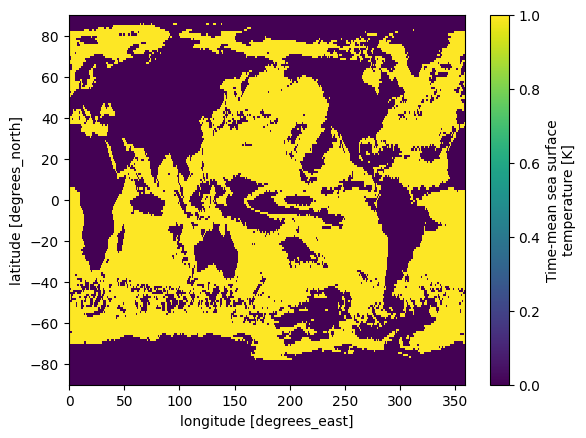

In [8]:
mask['__xarray_dataarray_variable__'].plot()

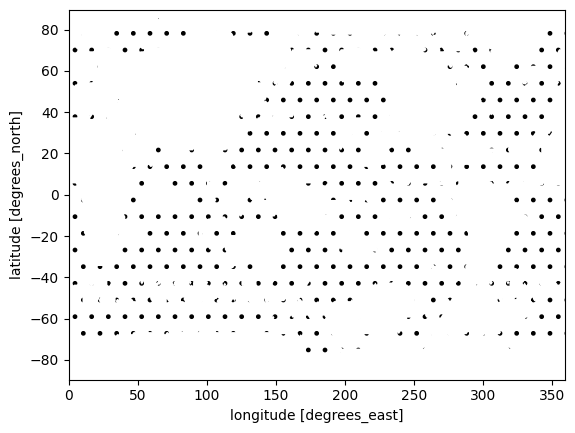

In [9]:
mask['__xarray_dataarray_variable__'].where(mask['__xarray_dataarray_variable__'] == 1).plot.contourf(levels=[0, 1], colors='none', hatches=['.', ''], add_colorbar=False)

In [10]:
map['__xarray_dataarray_variable__'].aqua.plot_single_map(fig

SyntaxError: incomplete input (1844681386.py, line 1)

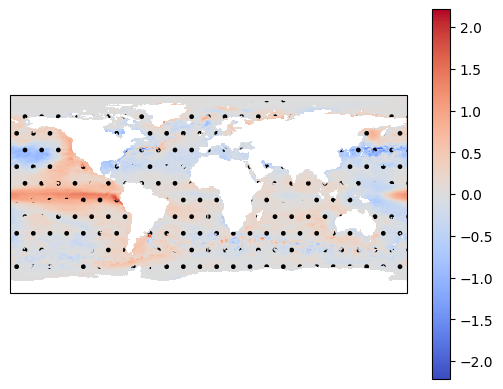

In [ ]:
# Plot reg map and mask as stippling
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
fig.

reg_plot = map['__xarray_dataarray_variable__'].plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm', add_colorbar=False)

# Plot mask as dots where mask is 0
mask['__xarray_dataarray_variable__'].where(mask['__xarray_dataarray_variable__'] == 1).plot.contourf(levels=[0, 1], colors='none', hatches=['.', ''], add_colorbar=False)
#mask['__xarray_dataarray_variable__'].where(mask['__xarray_dataarray_variable__'] == 1).plot.scatter(ax=ax, transform=ccrs.PlateCarree(), marker='o', linestyle='none', alpha=0.5)

fig.colorbar(reg_plot, ax=ax, orientation='vertical')

plt.show()